# import

In [3]:
import os
import re
import pandas as pd
import numpy as np

# Google Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# 크롤링한 데이터가 있는 경로로 이동
path = '*******************************************'
os.chdir(path)

In [ ]:
os.getcwd()

In [ ]:
os.listdir()

### 경로에 있는 모든 파일명 읽어오기

In [ ]:
path = '*******************************************'
filenames = os.listdir(path)

# 중복 가게명 제거
filenames = list(set(filenames))
print(filenames)

In [ ]:
yogiyo_review = None

for filename in filenames:
    if filename[-3:] == 'csv' :
        temp = pd.read_csv(path + filename) # sep=','

    elif filename[-3:] == 'txt' :
        temp = pd.read_table(path + filename) # sep='\t'
    
    if yogiyo_review is None:
        yogiyo_review = temp
        continue

    yogiyo_review = pd.concat([yogiyo_review, temp])

# 인덱스 초기화
yogiyo_review = yogiyo_review.reset_index()

# 자동으로 생성되었던 인덱스 열이 있다면 날려버리기
if 'Unnamed: 0' in yogiyo_review.columns :
    yogiyo_review = yogiyo_review.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0.1' in yogiyo_review.columns :
    yogiyo_review = yogiyo_review.drop(['Unnamed: 0.1'], axis=1)
if 'index' in yogiyo_review.columns :
    yogiyo_review = yogiyo_review.drop(['index'], axis=1)

# 카테고리를 범주형 데이터로 변환 
yogiyo_review.Category = yogiyo_review.Category.astype('category')

yogiyo_review_df = yogiyo_review.copy()

In [ ]:
print(yogiyo_review.shape)
yogiyo_review.head()

In [ ]:
yogiyo_review_df = yogiyo_review_df[yogiyo_review_df['Total']!='Total']
print(yogiyo_review_df.shape)
yogiyo_review_df.head()

In [ ]:
# string -> int
yogiyo_review_df[['Total', 'Taste', 'Quantity', 'Delivery']] = yogiyo_review_df[['Total', 'Taste', 'Quantity', 'Delivery']].apply(pd.to_numeric)
#yogiyo_review_df[['Total','Taste','Quantity','Delivery']].astype('int') 

yogiyo_review_df.Total.unique()

In [32]:
yogiyo_review_df.to_csv('*******************************************', index = None)

In [ ]:
yogiyo_review_df = yogiyo_review_df.drop(['Category','Location','Restaurant','UserID','Menu','Date','Taste','Quantity','Delivery'],axis=1)
yogiyo_review_df

In [34]:
yogiyo_review_df.Total.value_counts()

5    181313
4     26165
3      8696
1      5014
2      2798
Name: Total, dtype: int64

In [ ]:
# 불용어 및 특수문자를 없애는 함수
def regex_review(review):
    p = re.compile('[^가-힣 ]')
    result = p.sub('',review)
    result = result.strip()
    result = result.replace('  ', ' ')
    result = result.replace('   ', ' ')
    return result
yogiyo_review_df['regex_review'] = yogiyo_review_df['Review'].apply(regex_review)
yogiyo_review_df

In [ ]:
# 정제한 리뷰의 길이를 센 컬럼 추가
yogiyo_review_df['길이'] = [len(regex_review) for regex_review in yogiyo_review_df.regex_review.to_list()]
yogiyo_review_df

In [ ]:
# 글자 수가 12개 이상인 것만 남기기
yogiyo_review_df = yogiyo_review_df[yogiyo_review_df['길이'] >= 12]
yogiyo_review_df

In [38]:
yogiyo_review_df.Total.value_counts()

5    172221
4     24868
3      8388
1      4928
2      2734
Name: Total, dtype: int64

In [39]:
yogiyo_review_df[['Total', 'Review']].to_csv('*******************************************', index = None)

676
12
44.586068246543334


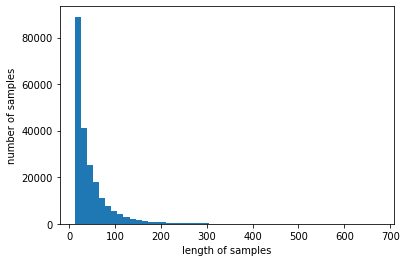

In [25]:
# 리뷰 길이 시각화
import matplotlib.pyplot as plt

df = pd.read_csv('*******************************************')

print(df.Review.apply(len).max())
print(df.Review.apply(len).min())
print(df.Review.apply(len).mean())

plt.hist([len(s) for s in df.Review], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()